# Setup

In [80]:
!pip install biopython

In [81]:
import time
import os
from functools import wraps
from typing import Callable, Any

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

In [82]:
def test_solution(func: Callable, input: str, expected: Any, *args) -> None:
  test_file = 'tmp.txt'
  with open(test_file, 'w') as f:
    f.write(input)
  actual = func(test_file, *args)
  print("Test passed!") if actual == expected else print(f"Test failed: \nExpected output: {expected}, \nActual output: {actual}")

def timeit(n=1):
    def decorator(func):
        def wrapper(*args, **kwargs):
            total = 0
            for _ in range(n):
                start = time.perf_counter()
                func(*args, **kwargs)
                end = time.perf_counter()
                total += (end - start)
            avg_time = round(total/n, 6)
            print(f"Average execution time over {n} calls: {avg_time} seconds") if avg_time else None
            return func(*args, **kwargs)
        return wrapper
    return decorator

@timeit(n=1000)
def test_performance(func: function, filename: str) -> None:
  func(filename)

# Bioinformatics Stronghold

## Counting DNA Nucleotides

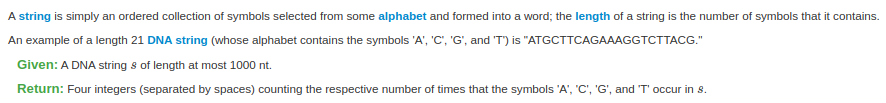

In [83]:
def count_dna_nucleotides(filename: str) -> tuple:
  with open(filename) as f:
    s = f.read()
  return (s.count('A'), s.count('C'), s.count('G'), s.count('T'))

test_input = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"
test_output = (20, 12, 17, 21)
test_solution(count_dna_nucleotides, test_input, test_output)

Test passed!


## Transcribing DNA into RNA

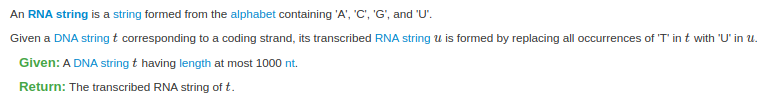

In [84]:
def transcribe_dna_into_rna(filename: str) -> str:
  with open(filename) as f:
    s = f.read()
  return s.replace('T', 'U')

# def transcribe_dna_into_rna(s: str) -> str:
#   table = str.maketrans({'T': 'U'})
#   return s.translate(table)

test_input = "GATGGAACTTGACTACGTAAATT"
test_output = "GAUGGAACUUGACUACGUAAAUU"
test_solution(transcribe_dna_into_rna, test_input, test_output)

Test passed!


## Complementing a Strand of DNA

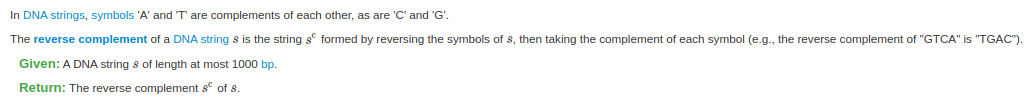

In [85]:
# def complement_dna_strand(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read()
#   complements = {'A': 'T', 'G': 'C', 'C': 'G', 'T': 'A'}
#   return ''.join(complements[i] for i in reversed(s) if i in complements)

# def complement_dna_strand(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read()
#   return s.replace('A', 't').replace('T', 'a').replace('C', 'g').replace('G', 'c').upper()[::-1]

def complement_dna_strand(filename: str) -> str:
  with open(filename) as f:
    s = f.read()
  return s[::-1].translate(str.maketrans('ACGT', 'TGCA'))


test_input = "AAAACCCGGT"
test_output = "ACCGGGTTTT"
test_solution(complement_dna_strand, test_input, test_output)

Test passed!


## Counting GC content

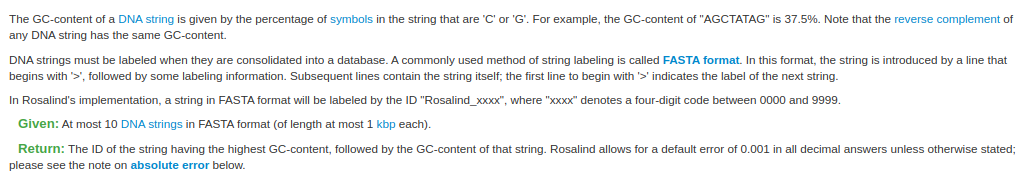

In [87]:
def count_gc_content(filename: str) -> tuple:
  with open(filename) as f:
    gc = {}
    current = None
    # get records
    for line in f.readlines():
      if line.startswith('>'):
        current = line[1:].rstrip()
        gc[current] = ''
      else:
        gc[current] += line.rstrip()
    # count percents
    for k,v in gc.items():
      gc[k] = (v.count('C')+v.count('G'))/len(v)*100
    id = max(gc, key=gc.get)
    return (id, f'{gc[id]:.6f}')

# def count_gc_content(filename: str) -> tuple:
#   with open(filename) as f:
#     s = f.read()
#   genes = s.split(">")[1:]
#   gc = []
#   for gene in genes:
#     a = gene.count("C") + gene.count("G")
#     b = gene.count("C") + gene.count("G") + gene.count("A") + gene.count("T")
#     gc.append(float(a)*100/b)
#   return (genes[gc.index(max(gc))][:13], f'{max(gc):.6f}')

# def count_gc_content(filename: str) -> tuple:
#   gc = {}
#   for record in SeqIO.parse(filename, 'fasta'):
#     gc[record.id] = gc_fraction(record.seq)
#   id = max(gc, key=gc.get)
#   return (id, f'{gc[id]*100:.6f}')



test_input = """>Rosalind_6404
CCTGCGGAAGATCGGCACTAGAATAGCCAGAACCGTTTCTCTGAGGCTTCCGGCCTTCCC
TCCCACTAATAATTCTGAGG
>Rosalind_5959
CCATCGGTAGCGCATCCTTAGTCCAATTAAGTCCCTATCCAGGCGCTCCGCCGAAGGTCT
ATATCCATTTGTCAGCAGACACGC
>Rosalind_0808
CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGAC
TGGGAACCTGCGGGCAGTAGGTGGAAT
"""
test_output = ('Rosalind_0808', '60.919540')

test_solution(count_gc_content, test_input, test_output)

Test passed!
